In [4]:
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier


In [15]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"  # Set it to the number of cores you want to use


In [2]:
# !pip install scikit-learn

In [3]:
#loading encoded data from csv

train_encoded = pd.read_csv("../data/BinaryClassify/train_nsl_kdd_binary_encoded.csv")
test_encoded = pd.read_csv("../data/BinaryClassify/test_nsl_kdd_binary_encoded.csv")

In [4]:
 train_encoded  

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
0,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,15,1
1,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,19,0
2,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,21,1
3,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,21,1
4,0,1,49,1,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,1,49,5,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,20,0
125968,8,2,49,9,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,21,1
125969,0,1,54,9,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,18,1
125970,0,1,30,5,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,20,0


In [5]:
train_encoded.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,binaryoutcome
count,125972.000000,125972.000000,125972.000000,125972.00000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,1.053202,31.226558,6.97998,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,...,0.521244,0.082952,0.148379,0.032543,0.284455,0.278487,0.118832,0.120241,19.504056,0.534579
std,2604.525522,0.426621,16.346504,2.68937,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,...,0.448950,0.188922,0.308998,0.112564,0.444785,0.445670,0.306559,0.319460,2.291512,0.498805
min,0.000000,0.000000,0.000000,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.000000,5.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,1.000000,24.000000,9.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
75%,0.000000,1.000000,49.000000,9.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,42908.000000,2.000000,69.000000,10.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [6]:
xtrain = train_encoded.drop('binaryoutcome', axis=1)
ytrain = train_encoded['binaryoutcome']
xtest = test_encoded.drop('binaryoutcome', axis=1)
ytest = test_encoded['binaryoutcome']

## KNN Testing

In [65]:
knn = KNeighborsClassifier(5)

In [66]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [67]:
yp = knn.predict(xtest)

In [68]:
knn.score(xtest,ytest)

0.7766047109967618

## Pearson

In [7]:
pearson_features = pd.read_csv("sorted_pearson_feature.csv")
pearson_features = pearson_features.sort_values(by='binaryoutcome',ascending=False)

In [8]:
pearson_features = pearson_features[pearson_features.feature != 'binaryoutcome']
pearson_features

,feature,binaryoutcome
40,same_srv_rate,0.751912
39,dst_host_srv_count,0.722546
38,dst_host_same_srv_rate,0.693813
37,logged_in,0.690181
36,flag,0.647071
35,level,0.379707
34,protocol_type,0.281357
33,srv_diff_host_rate,0.119380
32,is_guest_login,0.039280
31,num_access_files,0.036701


In [9]:
feature_sorted = list(pearson_features.feature)

In [10]:
feature_sorted

['same_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'logged_in',
 'flag',
 'level',
 'protocol_type',
 'srv_diff_host_rate',
 'is_guest_login',
 'num_access_files',
 'su_attempted',
 'num_file_creations',
 'root_shell',
 'hot',
 'num_root',
 'num_compromised',
 'num_shells',
 'num_failed_logins',
 'urgent',
 'is_host_login',
 'srv_count',
 'dst_bytes',
 'src_bytes',
 'land',
 'duration',
 'dst_host_srv_diff_host_rate',
 'dst_host_same_src_port_rate',
 'wrong_fragment',
 'diff_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_rerror_rate',
 'rerror_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'service',
 'dst_host_count',
 'count',
 'srv_serror_rate',
 'serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'num_outbound_cmds']

## Testing

In [52]:
a=['dst_host_srv_serror_rate',
 'num_outbound_cmds']
    

In [54]:
xtrain[xtrain.columns.intersection(a)]

,num_outbound_cmds,dst_host_srv_serror_rate
0,0,0.00
1,0,1.00
2,0,0.01
3,0,0.00
4,0,0.00
...,...,...
125967,0,1.00
125968,0,0.00
125969,0,0.00
125970,0,1.00


In [70]:
score=dict()
for i in range(1,len(feature_sorted)+1):
    x = xtrain[xtrain.columns.intersection(feature_sorted[:i])]
    x_t = xtest[xtest.columns.intersection(feature_sorted[:i])]
    knn = KNeighborsClassifier(5)
    print("------i=",i,"---------")
    print("features = ",feature_sorted[:i])
    knn.fit(x,ytrain)
    score[i] = knn.score(x_t,ytest)

------i= 1 ---------
features =  ['same_srv_rate']
------i= 2 ---------
features =  ['same_srv_rate', 'dst_host_srv_count']
------i= 3 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']
------i= 4 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in']
------i= 5 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag']
------i= 6 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level']
------i= 7 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type']
------i= 8 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate']
------i= 9 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'lo

In [71]:
score

{1: 0.671694095728164,
 2: 0.7086900589983587,
 3: 0.7284301113427671,
 4: 0.7506099454376082,
 5: 0.7514971388014018,
 6: 0.8783214301557024,
 7: 0.8948232267222641,
 8: 0.8928714013219181,
 9: 0.8937585946857117,
 10: 0.8938473140220912,
 11: 0.8940691123630395,
 12: 0.8948232267222641,
 13: 0.8948675863904538,
 14: 0.8800958168832897,
 15: 0.880894290910704,
 16: 0.8823138002927738,
 17: 0.8823581599609635,
 18: 0.8835558710020849,
 19: 0.8835558710020849,
 20: 0.8835558710020849,
 21: 0.8696269351905248,
 22: 0.8171050880539413,
 23: 0.7791775717517633,
 24: 0.7791775717517633,
 25: 0.7805083617974538,
 26: 0.780464002129264,
 27: 0.780464002129264,
 28: 0.780464002129264,
 29: 0.7805083617974538,
 30: 0.780464002129264,
 31: 0.7804196424610744,
 32: 0.7802865634565054,
 33: 0.7801091247837466,
 34: 0.7801091247837466,
 35: 0.7942154992680655,
 36: 0.7830812225524553,
 37: 0.7766934303331411,
 38: 0.7766490706649515,
 39: 0.7766490706649515,
 40: 0.7766934303331411,
 41: 0.77660471

In [74]:
import matplotlib.pyplot as plt

In [82]:
x,y = zip(*score.items())

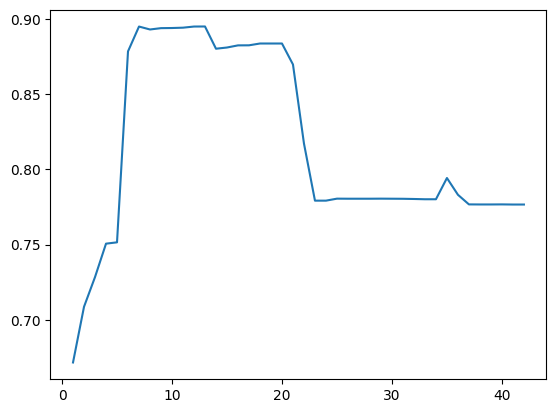

In [85]:
plt.plot(x,y)

## Plot

In [13]:
def train_knn_plot(n):
    score=dict()
    for i in range(1,len(feature_sorted)+1):
        x = xtrain[xtrain.columns.intersection(feature_sorted[:i])]
        x_t = xtest[xtest.columns.intersection(feature_sorted[:i])]
        knn = KNeighborsClassifier(n)
        print("------i=",i,"---------")
        print("features = ",feature_sorted[:i])
        knn.fit(x,ytrain)
        score[i] = knn.score(x_t,ytest)

    x,y = zip(*score.items())
    return x,y
        
    

In [90]:
k_score = dict()

for k in range(1,10):
    
    k_score[k] = train_knn_plot(k)
    
    

------i= 1 ---------
features =  ['same_srv_rate']
------i= 2 ---------
features =  ['same_srv_rate', 'dst_host_srv_count']
------i= 3 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']
------i= 4 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in']
------i= 5 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag']
------i= 6 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level']
------i= 7 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type']
------i= 8 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate']
------i= 9 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'lo

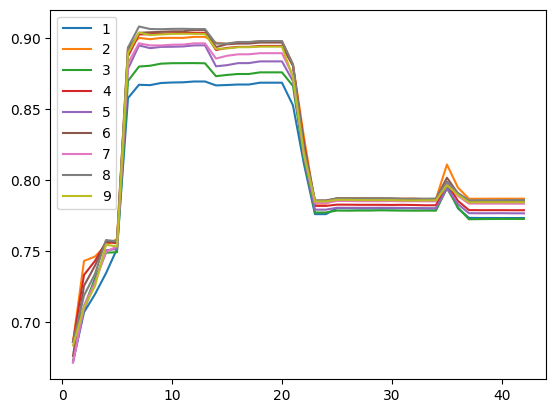

In [98]:
for k in k_score:

    plt.plot(k_score[k][0],k_score[k][1])
    
plt.legend(list(k_score.keys()))
plt.show()

In [97]:
list(k_score.keys())

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [99]:
import numpy as np

In [105]:
for k in k_score:
    print(k,"- average:",np.average(np.average(k_score[k][1][:15])))

1 - average: 0.8170074967839239
2 - average: 0.845001404722826
3 - average: 0.8276094574812579
4 - average: 0.844584423841843
5 - average: 0.8339528900323825
6 - average: 0.8445400641736532
7 - average: 0.8358899288766654
8 - average: 0.8456727143680964
9 - average: 0.8414289727779501


In [17]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cholesky',max_iter=100)
lr.fit(xtrain,ytrain)



C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:498: LinAlgWarning: The inner solver of NewtonCholeskySolver stumbled upon a singular or very ill-conditioned Hessian matrix at iteration #1. It will now resort to lbfgs instead.
Further options are to use another solver or to avoid such situation in the first place. Possible remedies are removing collinear features of X or increasing the penalization strengths.
The original Linear Algebra message was:
Ill-conditioned matrix (rcond=9.21189e-19): result may not be accurate.
  warnings.warn(
C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:195: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res)


LogisticRegression(solver='newton-cholesky')

In [101]:
np.average(k_score[1][1])

0.8054511695109664

In [18]:

xtest = test_encoded.drop('binaryoutcome', axis=1)
ytest = test_encoded['binaryoutcome']
ytest = test_encoded['binaryoutcome']
lr.score(xtest,ytest)

0.7026127844563723

In [ ]:
pearson_features = pd.read_csv("sorted_pearson_feature.csv")
pearson_features = pearson_features.sort_values(by='binaryoutcome',ascending=False)

In [ ]:
pearson_features = pearson_features[pearson_features.feature != 'binaryoutcome']
pearson_features

In [19]:
score=dict()
for i in range(1,len(feature_sorted)+1):
    x = xtrain[xtrain.columns.intersection(feature_sorted[:i])]
    x_t = xtest[xtest.columns.intersection(feature_sorted[:i])]
    lr = LogisticRegression()
    print("------SVM  i=",i,"---------")
    print("features = ",feature_sorted[:i])
    lr.fit(x,ytrain)
    score[i] = lr.score(x_t,ytest)

------SVM  i= 1 ---------
features =  ['same_srv_rate']
------SVM  i= 2 ---------
features =  ['same_srv_rate', 'dst_host_srv_count']
------SVM  i= 3 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate']
------SVM  i= 4 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in']
------SVM  i= 5 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag']
------SVM  i= 6 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 7 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 8 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 9 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 10 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 11 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 12 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 13 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 14 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 15 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 16 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 17 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 18 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 19 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 20 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 21 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 22 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 23 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 24 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 25 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 26 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 27 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 28 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 29 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 30 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 31 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 32 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 33 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 34 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 35 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 36 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 37 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 38 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count', 'srv_serror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 39 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count', 'srv_serror_rate', 'serror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 40 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 41 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


------SVM  i= 42 ---------
features =  ['same_srv_rate', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'logged_in', 'flag', 'level', 'protocol_type', 'srv_diff_host_rate', 'is_guest_login', 'num_access_files', 'su_attempted', 'num_file_creations', 'root_shell', 'hot', 'num_root', 'num_compromised', 'num_shells', 'num_failed_logins', 'urgent', 'is_host_login', 'srv_count', 'dst_bytes', 'src_bytes', 'land', 'duration', 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'wrong_fragment', 'diff_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_rerror_rate', 'rerror_rate', 'dst_host_srv_rerror_rate', 'srv_rerror_rate', 'service', 'dst_host_count', 'count', 'srv_serror_rate', 'serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'num_outbound_cmds']


C:\Users\aravi\.conda\envs\nsl-kdd\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
score

{1: 0.7005278800514572,
 2: 0.7127711484718094,
 3: 0.7201348533912967,
 4: 0.7289624273610433,
 5: 0.7383223173490663,
 6: 0.8497094441733576,
 7: 0.8731757086456994,
 8: 0.8664773987490574,
 9: 0.876147806414408,
 10: 0.876014727409839,
 11: 0.8752606130506144,
 12: 0.8768575611054429,
 13: 0.8704697688861287,
 14: 0.8423457392538704,
 15: 0.8542341303287051,
 16: 0.8283724437741206,
 17: 0.829570154815242,
 18: 0.8287716807878277,
 19: 0.8296588741516213,
 20: 0.8286829614514484,
 21: 0.7625870558488222,
 22: 0.6963580712416271,
 23: 0.7246595395466442,
 24: 0.7077141462981857,
 25: 0.4372976090138846,
 26: 0.517145011755312,
 27: 0.6786142039657543,
 28: 0.6786585636339441,
 29: 0.6786142039657543,
 30: 0.6822073370891186,
 31: 0.6044891984207958,
 32: 0.6178414585458901,
 33: 0.6812757840571353,
 34: 0.6810983453843765,
 35: 0.71547708823138,
 36: 0.739475668721998,
 37: 0.7019917491017167,
 38: 0.7042097325112008,
 39: 0.7025240651199929,
 40: 0.7028345827973207,
 41: 0.702612784

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


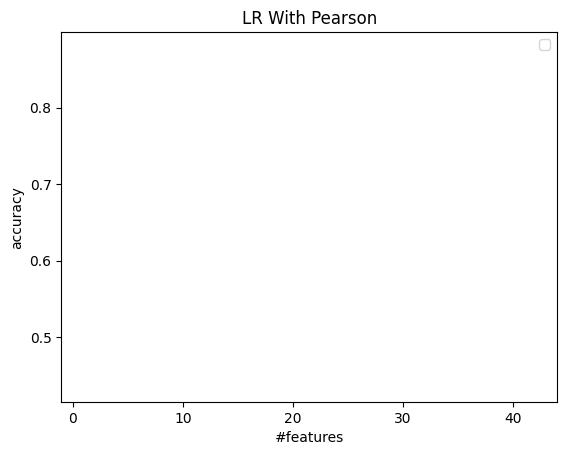

In [33]:
 import matplotlib.pyplot as plt
for i in range(1,len(feature_sorted)+1):
        plt.plot(i,score[i])
   
plt.legend()
plt.xlabel('#features')
plt.ylabel('accuracy')
plt.title('LR With Pearson')
plt.show()

## Plotting with KNN

In [12]:
!pip install tqdm

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------------- ------------------------ 20.5/57.6 kB 320.0 kB/s eta 0:00:01
     --------------------------- ---------- 41.0/57.6 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 503.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 2.2 MB/s eta 0:00:00


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
import matplotlib.pyplot as plt

def train_knn_plot(n, xtrain, xtest, ytrain, ytest, feature_sorted):
    score = dict()
    feature_count = len(feature_sorted)

    for i in tqdm(range(1, feature_count + 1), desc="Training Progress"):
        # Select the top i features
        selected_features = feature_sorted[:i]

        # Normalize features
        scaler = StandardScaler()
        x_train_normalized = scaler.fit_transform(xtrain[selected_features])
        x_test_normalized = scaler.transform(xtest[selected_features])

        # Train KNN classifier
        knn = KNeighborsClassifier(n)
        knn.fit(x_train_normalized, ytrain)

        # Evaluate performance on the test set
        score[i] = knn.score(x_test_normalized, ytest)

    # Plot the results with improved aesthetics
    plt.figure(figsize=(10, 6))
    plt.plot(list(score.keys()), list(score.values()), marker='o', linestyle='-', color='b')
    plt.title('KNN Performance with Increasing Number of Features', fontsize=16)
    plt.xlabel('Number of Features', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(True)
    plt.show()




## Chi square and KNN

Training Progress: 100%|███████████████████████████████████████████████████████████████| 42/42 [05:32<00:00,  7.91s/it]


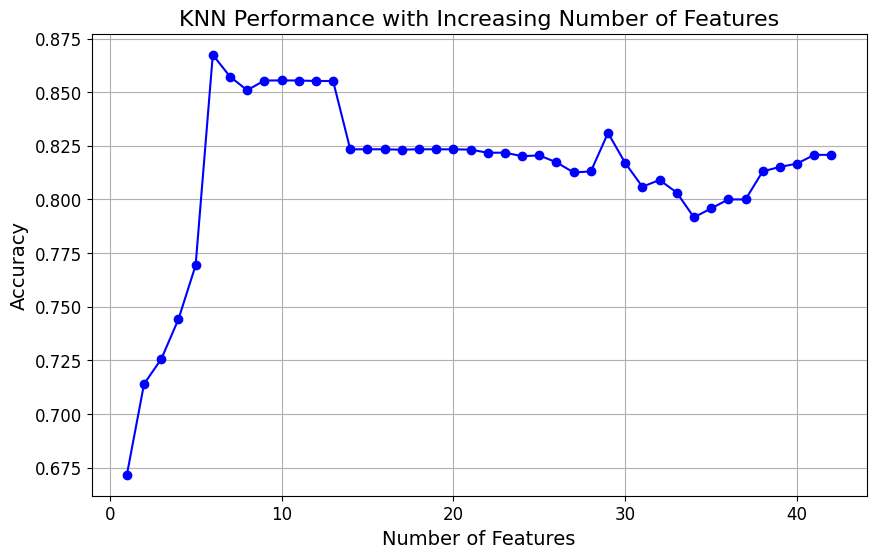

In [16]:
# Example usage
# Assuming you have xtrain, xtest, ytrain, ytest, and feature_sorted defined
train_knn_plot(n=5, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest, feature_sorted=feature_sorted)

## Chi Square and KNN

In [18]:
chi2_sorted = pd.read_csv('../chi2/sorted_chi2.csv').sort_values(by='chi2',ascending=False)
chi2_sorted

,feature,chi2
22,src_bytes,3.340258e+09
33,dst_bytes,1.746063e+09
3,duration,7.082565e+06
5,dst_host_srv_count,6.968827e+06
9,count,6.525617e+06
1,dst_host_count,9.574258e+05
2,service,8.243794e+04
12,flag,5.465393e+04
17,dst_host_srv_serror_rate,3.854382e+04
18,srv_serror_rate,3.745132e+04


In [19]:
chi2_features = list(chi2_sorted.feature)

Training Progress: 100%|███████████████████████████████████████████████████████████████| 42/42 [02:29<00:00,  3.57s/it]


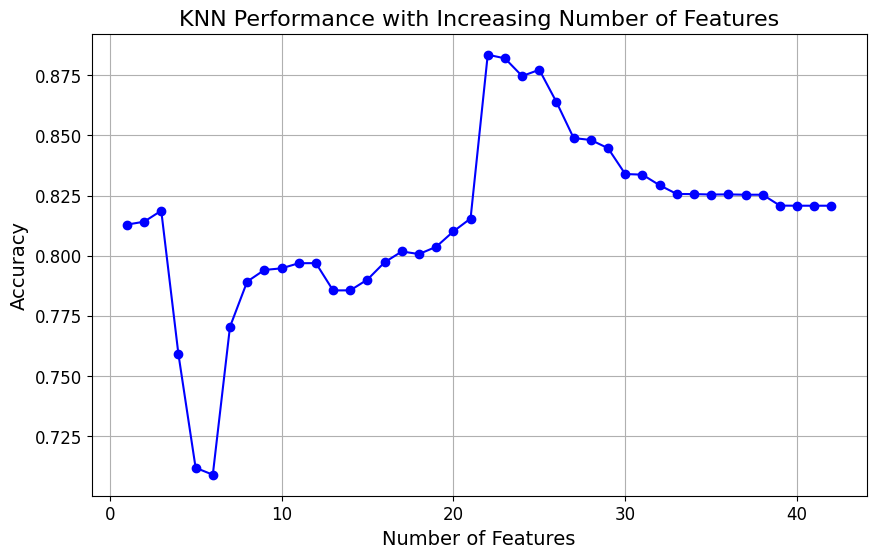

In [20]:
# Example usage
# Assuming you have xtrain, xtest, ytrain, ytest, and feature_sorted defined
train_knn_plot(n=5, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest, feature_sorted=chi2_features)

## Gain ratio and KNN

In [22]:
gr_sorted = pd.read_csv('../gainratio/sorted_gr.csv').sort_values(by='gainratio',ascending=False)
gr_sorted

,feature,gainratio
10,dst_host_srv_rerror_rate,0.742729
11,protocol_type,0.066256
12,is_host_login,0.059734
13,num_root,0.045458
14,num_access_files,0.024778
15,dst_bytes,0.019731
16,su_attempted,0.011030
17,dst_host_diff_srv_rate,0.009891
18,wrong_fragment,0.004625
19,level,0.003545


In [23]:
gr_features = list(gr_sorted.feature)

Training Progress: 100%|███████████████████████████████████████████████████████████████| 42/42 [05:07<00:00,  7.33s/it]


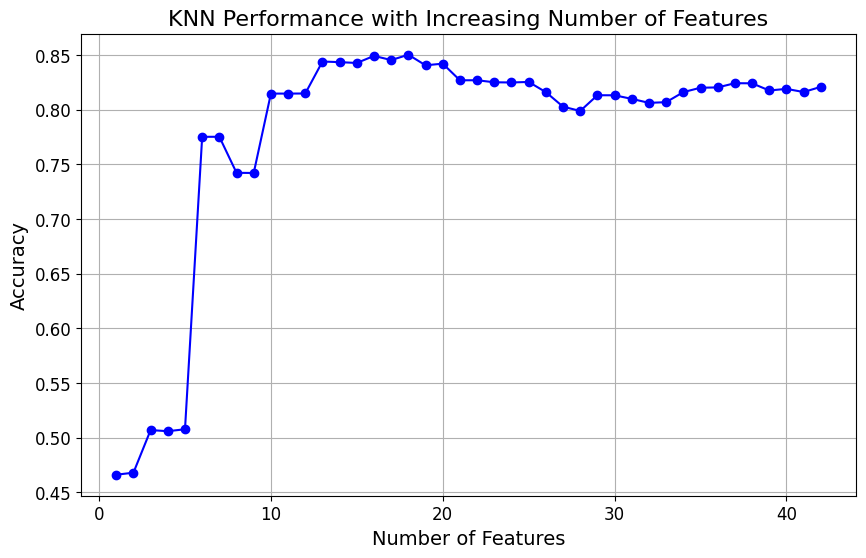

In [24]:
# Example usage
# Assuming you have xtrain, xtest, ytrain, ytest, and feature_sorted defined
train_knn_plot(n=5, xtrain=xtrain, xtest=xtest, ytrain=ytrain, ytest=ytest, feature_sorted=gr_features)

ddocumentation

